In [1]:
import pandas as pd
import numpy as np
from glob import glob
import sys
sys.path += ["../src"]
import jl_vae
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots as sbp
from sklearn.preprocessing import StandardScaler



In [2]:
#wsd = pd.read_csv('/data/housing/data/intermediate/jl_pop_synth/Sliced_WD_all_prov.txt').rename(columns = {"index": "method", "province": "prov", "Wasserstein distance": "distance"})
wsd = pd.read_csv("/data/housing/data/intermediate/jl_pop_synth/wasserstein_isp_250827.csv", index_col = 0)
wsd = wsd[[u for u in wsd.columns if "95" not in u]]
wsd.index.name = None

In [ ]:
#df_wsd = wsd.set_index(["method", "prov"]).unstack().apply(lambda x: (x - x.mean()) / x.std()).drop(["nfvae_vs_null"])

In [9]:
wsd.to_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_wasserstein_geo_isp.csv")
df_wsd = pd.read_csv(f"/data/housing/data/intermediate/jl_pop_synth/similarity_wasserstein_geo_isp.csv", index_col = 0)
df_wsd = wsd.drop(columns = ["df_real"]).apply(lambda x: (x - x.mean()) / x.std(), axis = 1)

In [11]:
#df_wsd["distance"].T.mean().sort_values()
df_wsd.mean().sort_values()

df_copula_nf               -0.991473
df_nfvae                   -0.667578
df_shuffle_cap_num         -0.661200
df_shuffle_cap_bins        -0.656978
df_copula_ablation         -0.315089
df_ablation                 1.062507
df_shuffle_province_bins    1.113018
df_shuffle_province_num     1.116793
dtype: float64

<Axes: >

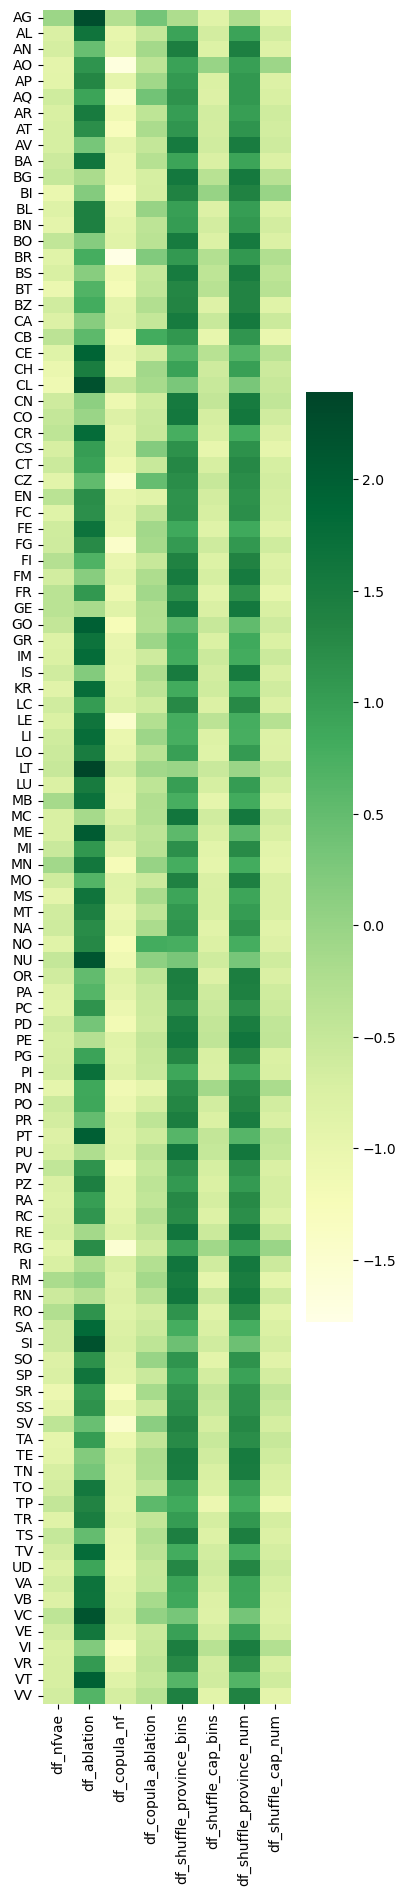

In [12]:
fig, axes = sbp(figsize = (4,22))

#sns.heatmap(df_wsd["distance"].T, cmap = "YlGn")
sns.heatmap(df_wsd, cmap = "YlGn")

<Axes: xlabel='distance', ylabel='method'>

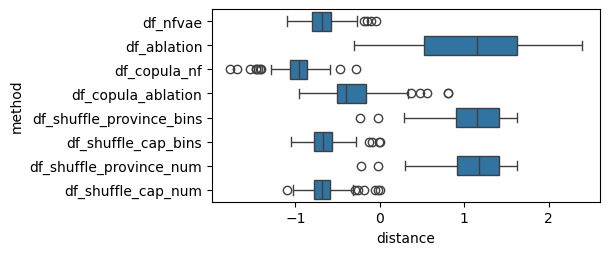

In [13]:
fig, axes = sbp(figsize = (5, 2.5))

sns.boxplot(data = df_wsd.stack().reset_index().rename(columns = {"level_1": "method", 0: "distance"}), y = "method", x = "distance")